In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

# Model definition

Let $x$ be the input column vector of $n$ features. For simplicity's sake, let $x_0 = 1$, so we don't have to worry separately about the bias term.

Let $\theta$ be the column vector of parameters describing our linear model with $n$ rows.

Then, our hypothesis for linear regression will look like this:
$$y = h_{\theta}(x) = \theta_0 x_0 + \theta_1 x_1 + ... + \theta_n x_n = \theta^T x$$

In [2]:
def h(x, theta):
    return np.dot(theta.T, x)[0]

Let $X$ be the $m {\times} n$ matrix of inputs. Each row of this matrix represents a single training example, and each column represents a single feature. Let's denote the $j^{th}$ feature of the $i^{th}$ training example of $X$ as $X^{(i)}_j$. Again, for each row $i$ $X^{(i)}_0 = 1$.

Let $y$ be the output column vector with $m$ rows. Let's denote the $i^{th}$ output as $y^{(i)}$.

We will use MSE (L2) as our cost function:
$$J(\theta) = {1 \over {2m}} \sum_{i=1}^{m} (h_\theta(X^{(i)}) - y^{(i)})^2 = {1 \over {2m}} (X \theta - y)^T (X \theta - y)  $$

Our goal can then be defined as $$\min_{\theta} J(\theta)$$

In [3]:
def J(X, y, theta):
    m = X.shape[0]
    err = np.matmul(X, theta) - y
    
    return 1 / (2 * m) * np.sum(err ** 2)

The partial derivative of $J(\theta)$ for each $\theta_j$:

$${\partial \over {\partial \theta_j}} J(\theta) = {1 \over m} \sum_{i=1}^{m} ((h_\theta(X^{(i)}) - y^{(i)}) \cdot X^{(i)}_j) $$

In [4]:
def J_deriv(X, y, theta):
    m = X.shape[0]
    err = np.matmul(X, theta) - y
    
    return 1 / m * np.matmul(X.T, err)

# Batch gradient descent

We can use the batch gradient descent optimization algorithm to find the value of $\theta$ that minimizes $J(\theta)$.

Batch gradient descent algorithm can be defined as follows:

$Repeat\ until\ convergence\ \{ $

$\quad\theta_j := \theta_j - \alpha {\partial \over {\partial \theta_j}} J(\theta)$

$\}$

$\alpha$ is a hyperparameter called learning rate.

Additionally, instead of waiting for convergence, we can run batch gradient descent for a set number of epochs.

In [5]:
def gradient_descent(X, y, starting_theta, alpha=0.01, epochs=5):
    theta = np.copy(starting_theta)
    errors = [J(X, y, theta)]
    
    for epoch in range(epochs):
        derivs = J_deriv(X, y, theta)
        theta -= alpha * derivs
        
        errors.append(J(X, y, theta))
    
    return theta, errors

# Normal equation

Instead of using an iterative algorithm such as gradient descent, we can solve for $\theta$ analytically using the normal equation:
$$ \theta = (X^T X)^{-1} X^T y $$

In [6]:
def normal_equation(X, y):
    inverse = np.linalg.pinv(np.matmul(X.T, X))
    xty = np.matmul(X.T, y)
    
    return np.matmul(inverse, xty)

# Linear regression in practice

I will only work with single-feature linear regression in this notebook as it is easy to visualize.

### 1. Generating data

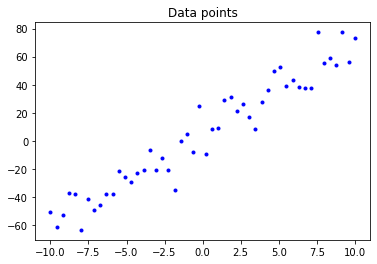

In [7]:
GEN_THETA = np.array([[3.5], [7.2]]) # random thetas for data generation
m = 50

data = np.linspace(-10, 10, m).reshape(-1, 1)
X = np.append(np.ones(data.shape), data, axis=1) # add X_0s

noise = np.random.normal(0, 10, m).reshape(-1, 1)
y = np.matmul(X, GEN_THETA) + noise # add random noise to our data

plt.plot(data, y, 'b.')
plt.title('Data points')

plt.show()

### 2. Training the model

#### Gradient descent

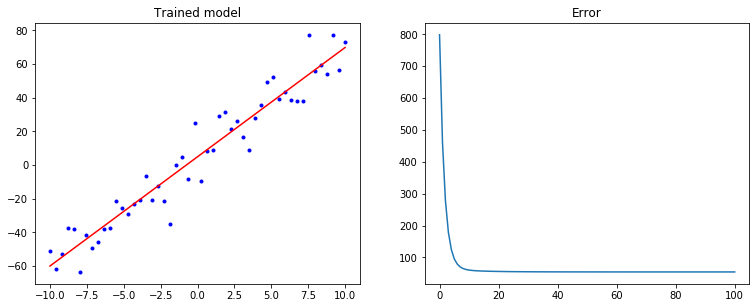

Learnt theta value:
[[4.87654902]
 [6.49418875]]
Final cost: 54.69879791480888


In [8]:
theta, errors = gradient_descent(X, y, np.zeros(GEN_THETA.shape), alpha=0.05, epochs=100)
pred_y = np.matmul(X, theta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4 * 2, 4.8))

ax1.plot(data, y, 'b.')
ax1.plot(data, pred_y, 'r')
ax1.set_title('Trained model')

ax2.plot(errors)
ax2.set_title('Error')

plt.show()

print('Learnt theta value:')
print(theta)

print('Final cost:', J(X, y, theta))

#### Normal equation

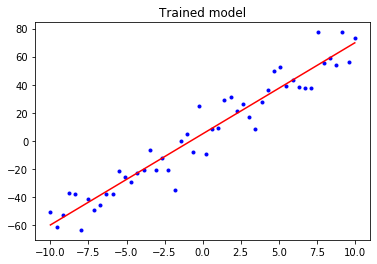

Learnt theta value:
[[4.90559272]
 [6.49418875]]
Final cost: 54.698376146407064


In [9]:
theta = normal_equation(X, y)
pred_y = np.matmul(X, theta)

plt.plot(data, y, 'b.')
plt.plot(data, pred_y, 'r')
plt.title('Trained model')

plt.show()

print('Learnt theta value:')
print(theta)

print('Final cost:', J(X, y, theta))

# Polynomial regression in practice (extra)

We can add polynomial features to our dataset in order to fit a polynomial model to the data.

### 1. Generate data

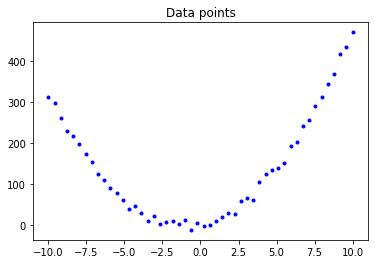

In [10]:
GEN_THETA = np.array([[3.5], [7.2], [3.9]]) # random thetas for data generation
m = 50

data = np.linspace(-10, 10, m).reshape(-1, 1)
X = np.append(np.ones(data.shape), data, axis=1) # add X_0s
X = np.append(X, data ** 2, axis=1) # add the square feature

noise = np.random.normal(0, 10, m).reshape(-1, 1)
y = np.matmul(X, GEN_THETA) + noise # add random noise to our data

plt.plot(data, y, 'b.')
plt.title('Data points')

plt.show()

### 2. Training the model

#### Gradient descent

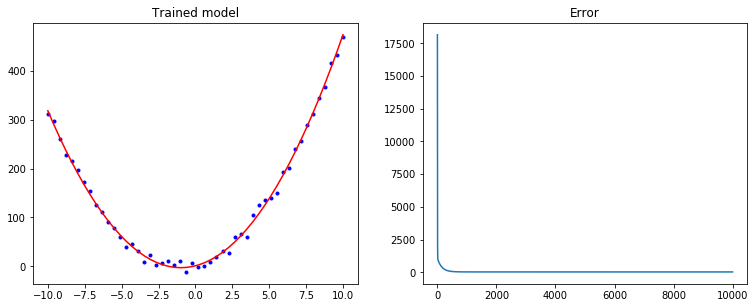

Learnt theta value:
[[0.74496754]
 [7.79199485]
 [3.95777279]]
Final cost: 31.137870132762544


In [11]:
theta, errors = gradient_descent(X, y, np.zeros(GEN_THETA.shape), alpha=1e-4, epochs=10000)
pred_y = np.matmul(X, theta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4 * 2, 4.8))

ax1.plot(data, y, 'b.')
ax1.plot(data, pred_y, 'r')
ax1.set_title('Trained model')

ax2.plot(errors)
ax2.set_title('Error')

plt.show()

print('Learnt theta value:')
print(theta)

print('Final cost:', J(X, y, theta))

#### Normal equation

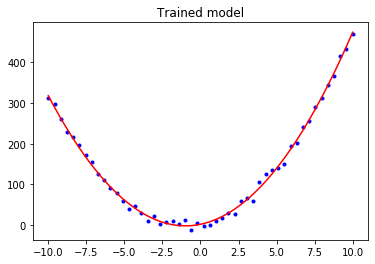

Learnt theta value:
[[1.96387857]
 [7.79199485]
 [3.93823986]]
Final cost: 30.807925075924988


In [12]:
theta = normal_equation(X, y)
pred_y = np.matmul(X, theta)

plt.plot(data, y, 'b.')
plt.plot(data, pred_y, 'r')
plt.title('Trained model')

plt.show()

print('Learnt theta value:')
print(theta)

print('Final cost:', J(X, y, theta))